# Umělý život

Umělý život se zabývá systémy, které připomínají skutečný život. Jejich cíl je pochopit, jak organismy fungují, komunikují a chovají se. Snaží se toto chování vytvořit a napodobovat pomocí programů. Na dnešním cvičení si zkusíme některé z těchto technik nasimulovat a podívat se na jejich chování.


##  Celulární automaty

Celulární automaty jsou (typicky) 1D nebo 2D mřížky, kde každé políčko může mít jednu z *k* barev, v nejjednodušším případě jsou barvy jen dvě, což značí že na některých políčkách organismus je a na jiných ne. Na základě barvy políčka a jeho sousedů do dané vzdálenosti se potom definují pravidla pro změny barev políček. Praktické využití celulárních automatů může být například při simulaci šíření požáru nebo pohyb aut ve vozovce.

Zkusíme si tedy jednoduchý celulární automat se 2 barvami nasimulovat. K tomu použijeme knihovnu [cellpylib](https://libraries.io/pypi/cellpylib), kde je celulární automat už naprogramovaný.

In [1]:
import matplotlib.pyplot as plt
import cellpylib as cpl

Zkusíme si nejprve nainicializovat jedince délky 100, který bude mít všude samé 0 a uprostřed jednu jedničku. Dále definujeme pravidlo, jak se bude každá trojice znaků přepisovat o řádek níž. Následně si i přehledně vypíšeme, na co se jednotlivé trojice přepisují. K tomu se bude hodit funkce ```bin```, která vrací binární ekvivalent čísla. Pro výpis převedeme binární pravidlo na pole a první dvě pozice zahodíme, protože na nich je jen prefix *0b* symbolizující binární zápis čísla. Nakonec si vykreslíme vzniklý obrázek, a protože knihovna ```cpl.plot``` používá ```matplotlib```, můžeme si speficikovat jeho rozměry námi známým způsobem.

cislo pravidla: 158
111 -> 1
110 -> 0
101 -> 0
100 -> 1
011 -> 1
010 -> 1
001 -> 1
000 -> 0


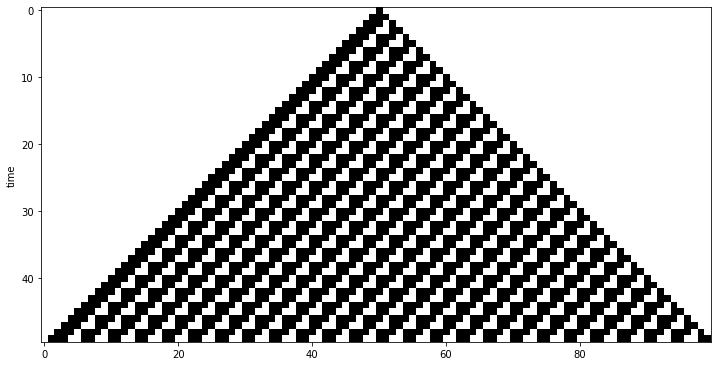

In [2]:
# init jedince
cellular_automaton = cpl.init_simple(100)

# definice pravidla 
rule_number = 0b10011110
print('cislo pravidla: ' + str(rule_number))

# evoluce
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=50, apply_rule=lambda n, c, s: cpl.nks_rule(n, rule_number))

# vypiseme si jak pravidlo vypada
rule_number_binary = '{0:08b}'.format(rule_number)
rule_triples = ['111','110','101','100','011','010','001','000']
for i, b in enumerate(rule_number_binary):
    print(rule_triples[i], '->', b)
    
# vykreslime si vznikly obrazec 
plt.figure(figsize=(12,8))
cpl.plot(cellular_automaton)

### Úkol na cvičení 1
Zkuste si pohrát s nastavením pravidel tak, abyste našli automat, který vygeneruje nějaké zajímavé obrazce (šachovnici, rovné čáry, [Sierpinskeho trojúhelník](https://cs.wikipedia.org/wiki/Sierpi%C5%84sk%C3%A9ho_troj%C3%BAheln%C3%ADk), nebo libovolné jiné :) ).

Uměli byste najít pravidlo, které povede k tomu, že celá řádka bude černá, pokud je na začátku více černých políček, a bude bílá, pokud je to naopak? Napadlo by vás, jak k tomu použít evoluční algoritmus?

## Convay's Game of Life

Game of Life je jedním z nejznámějších celulárních 2D automatů, kde nová hodnota každého políčka závisí na všech okolních políčkách. Pravidla jsou jednoduchá:
1. živá buňka s méně než dvěma nebo více než třemi živými sousedy umírá
2. živá buňka s dvěma nebo třemi živými sousedy přežívá
3. mrtvá buňka s právě třemi živými sousedy ožívá

Na základě těchto velmi jednoduchých pravidel se dají implementovat docela zajímavé organismy, které se množí, pohybují apod. To si vyzkoušíme díky knihovně [seagull](https://pyseagull.readthedocs.io/en/latest/index.html).

In [3]:
plt.rcParams["animation.html"] = "jshtml"
import seagull as sg
from seagull import Board

Vytvoříme si prostředí o dané velikosti a potom do něj přidáme oscilátor pár už předdefinovaných oscilátorů - Pulsar, Glider a Blinker. To ale není důležité, pojďme se raději podívat na to, jak se bude tato živá buňka chovat při animaci.

2022-05-17 11:41:26.459 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...
2022-05-17 11:41:26.472 | INFO     | seagull.simulator:animate:183 - Rendering animation...


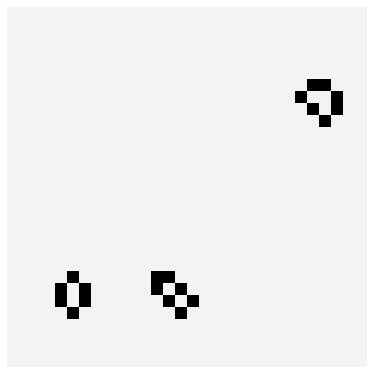

In [4]:
# inicializujeme prostor
board = sg.Board(size=(30,30))

# pridame 3 ruzne zive bunky 
board.add(sg.lifeforms.gliders.Glider(), loc=(15,4))
board.add(sg.lifeforms.oscillators.Pulsar(), loc=(5,12))
board.add(sg.lifeforms.oscillators.Blinker(length=4), loc=(22,5))

# pustime simulaci
sim = sg.Simulator(board)
sim.run(sg.rules.conway_classic, iters=150)

sim.animate()

V následujícím [videu](https://www.youtube.com/watch?v=3NDAZ5g4EuU) se pro zajímavost můžete podívat, že pomocí Game of Life se dají i vyrobit klasické digitální hodiny, když si šikovně vytvoříte ty potvůrky. Navíc Game of Life je Turingovsky úplná, což znamená, že je ekvivalentní Turigovu stroji, který je ekvivalentní RAM, takže na ní dokážu spočítat úplně cokoli. [Tady](https://bitstorm.org/gameoflife/) zase třeba můžeme hezky pozorovat simulace jednoduchých potvůrek.

### Úkol na cvičení 2

Vyzkoušejte si i vlastní organismy v Game of Life. Najdete nějaké, které se chovají zajímavě? Vlastní organismus můžete definovat pomocí ```lf.Custom```, jako parametr zadáte 2D pole 0 a 1. Dále si můžete hrát s různými velikostmi boardu a s různými počátečními pozicemi a sledovat, co se bude dít.

## Langton's Ant

Langtonův mravenec představuje další velmi jednoduchou simulaci života. Jde o mravence, který se pohybuje na mřížce se dvěma barvami. Při každém pohybu přebarví svoje políčko na opačnou barvu. V závislosti na počáteční barvě políčka se potom rozhoduje, jestli má jít doleva, nebo doprava.

Implementaci Langtonových mravenců si ukážeme v prostředí [NetLogo](http://ccl.northwestern.edu/netlogo/index.shtml), které se pro podobné simulace často používá. Budeme sledovat následující [tutoriál](https://www.cs.unm.edu/~joel/cs4all/langtons-ant.pdf).